# **Documentação**

**Aplicação de Algitmos de Machine Learning para Predição da Temperatura Interna ao Final da Corrida de 10km**

* Este projeto se dedica à aplicação de modelos de machine learning para prever a temperatura interna ao término de uma corrida autocontrolada de 10km. 

* A base de dados utilizada neste trabalho é proveniente do artigo de [Andrade et al. (2023)](https://pmc.ncbi.nlm.nih.gov/articles/PMC10988464/), com os dados brutos disponíveis pelos autores diretamente em https://doi.org/10.6084/m9.figshare.21508239.

* Previamente à modelagem, a base de dados foi submetida a um pré-processamento que incluiu a remoção de variáveis não utilizada aos modelos, a alteração da estrutura de dados das variáveis para formatos mais adequados, a eliminação de caracteres inválidos e a substituição de vírgulas por pontos para padronização numérica. 
Detalhes sobre estas transformações estão documentados no notebook **pre-processamento.ipynb** , localizado em **/home/lafise/Desktop/Samuel/leticiaag/pre-processamento.ipynb**. A partir dos dados pré-processados, foram geradas três bases de dados distintas, cada uma configurada para replicar os modelos de variáveis propostos pelos autores originais: Base de Dados 1 (10 variáveis), a Base de Dados 2 (8 variáveis) e a Base de Dados 3 (5 variáveis).

* O objetivo primário deste trabalho é avaliar a performance e otimização dos algoritmos de **Decision Tree, Random Forest, XGBoost e LASSO Regression** sobre as três bases de dados.

* No código abaixo, especificamente, foi realizada a modelagem dos quatro algoritmos de machine learning sobre a **Base de Dados 3**.

* **Variaveis preditoras** - WBGT, Running speed, Sweat rate, VO2max, HR

* **Variavel predita** - EndTcore

# Importando bibliotecas

## Geral

In [1]:
import pandas as pd #manipulacao de dados
import numpy as np #manipulacao de dados
import seaborn as sns #criacao de graficos
import matplotlib.pyplot as plt #criacao de graficos
from sklearn.metrics import mean_squared_error, r2_score #metricas de avaliacao dos algoritmos 
from sklearn.model_selection import train_test_split, GridSearchCV #amostragem e manipulacao de hiperparametros

## Decison tree

In [2]:
from sklearn.tree import DecisionTreeRegressor, plot_tree #modelo de decision tree e grafico de arvore

## Random Forest

In [3]:
from sklearn.ensemble import RandomForestRegressor #modelo de random forest

## XGBoost

In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [5]:
import xgboost as xgb #modelo de xgboos

## Regressão de LASSO

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso # Importado Lasso
from sklearn.preprocessing import StandardScaler # Importado StandardScaler
from sklearn.pipeline import Pipeline # Importado Pipeline

# Importando base de dados

In [7]:
df = pd.read_csv("/home/lafise/Desktop/Samuel/leticiaag/trabalho1/dados_modelo_3.csv") # base de dados usada em Decision tree
df2 = pd.read_csv("/home/lafise/Desktop/Samuel/leticiaag/trabalho1/dados_modelo_3.csv") # base de dados usada em Random Forest
df3 = pd.read_csv("/home/lafise/Desktop/Samuel/leticiaag/trabalho1/dados_modelo_3.csv") # base de dados usada em XGBoost
df4 = pd.read_csv("/home/lafise/Desktop/Samuel/leticiaag/trabalho1/dados_modelo_3.csv") # base de dados usada em Lasso Regression

# **DECISION TREE**

## Pré processamento - decision tree

In [8]:
X1 = df.drop("EndTCORE_C", axis=1) #separando as variaveis preditoras
y1 = df["EndTCORE_C"] #separando a variavel predita

In [9]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.20, random_state=42) #separando a base de dados de treino(80%) e teste(20%).
#a separacao em 80/20 foi escolhida porque a quantidade de dados para treinar o modelo quando a escolhido 70/30 ou 80/10/10 nao disponibilizava dados o suficiente 
#para a criacao do modelo, levando ao underfitting. para mitigar o overfitting comb a distribuicao 80/20, foi usado a tecnica de amostragem K-fold.

In [10]:
#otimizacao de hiperparametros
param_grid = {
    'max_depth': [5, 10, 15, 18, 20], #profundidade máxima da arvore
    'min_samples_leaf': [3, 5, 9, 10], #minimo de amostra por folha
    'min_samples_split': [3, 5, 8, 10], #minimo de amostras para dividir
    'ccp_alpha': [0.00, 0.02, 0.03] #regularizacao do custo de complexidade
}

In [11]:
dt_regressor_base = DecisionTreeRegressor(random_state=42) #criacao da instancia do modelo decision tree, utilizando random_state=42 para asegurar reprodutibilidade 

In [12]:
grid_search = GridSearchCV(estimator=dt_regressor_base, #algoritmo base
                           param_grid=param_grid, #hiperparametros
                           cv=5, #5 K-fold (validacao cruzada)
                           scoring='neg_mean_squared_error', #paramentros de escolha de melhor algoritmo
                           n_jobs=-1, # usa todos os nucleos de processamento disponiveis
                           verbose=1) #exibe de processamento

## Treinamento do modelo - Decision Tree

In [13]:
grid_search.fit(X_train1, y_train1) #treinando o modelos com a base de dados de treino

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.02, 0.03],
                         'max_depth': [5, 10, 15, 18, 20],
                         'min_samples_leaf': [3, 5, 9, 10],
                         'min_samples_split': [3, 5, 8, 10]},
             scoring='neg_mean_squared_error', verbose=1)

In [14]:
best_dt_regressor = grid_search.best_estimator_ #pegando os hiperparamentros usados no modelo gerado

## Avaliando o modelo - Decison tree

**Dados treino**

In [15]:
mse_train = mean_squared_error(y_train1, best_dt_regressor.predict(X_train1)) #calculando MSE
rmse_train = np.sqrt(mse_train) #calculando RMSE
r2_train = r2_score(y_train1, best_dt_regressor.predict(X_train1)) #calculando R2

In [16]:
print(f"\n--- Métricas de Avaliação do Modelo - Dados TREINO ---")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")


--- Métricas de Avaliação do Modelo - Dados TREINO ---
Mean Squared Error (MSE): 0.12
Root Mean Squared Error (RMSE): 0.34
R-squared (R²): 0.56


**Dados Teste**

In [17]:
mse_optimized = mean_squared_error(y_test1, best_dt_regressor.predict(X_test1)) #calculando MSE
rmse_optimized = np.sqrt(mse_optimized) #calculando RMSE
r2_optimized = r2_score(y_test1, best_dt_regressor.predict(X_test1)) #calculando R2


In [18]:
print(f"\n--- Métricas de Avaliação do Modelo - Dados TESTE---")
print(f"Mean Squared Error (MSE): {mse_optimized:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_optimized:.2f}")
print(f"R-squared (R²): {r2_optimized:.2f}")


--- Métricas de Avaliação do Modelo - Dados TESTE---
Mean Squared Error (MSE): 0.13
Root Mean Squared Error (RMSE): 0.36
R-squared (R²): 0.55


## Estrutura da árvore

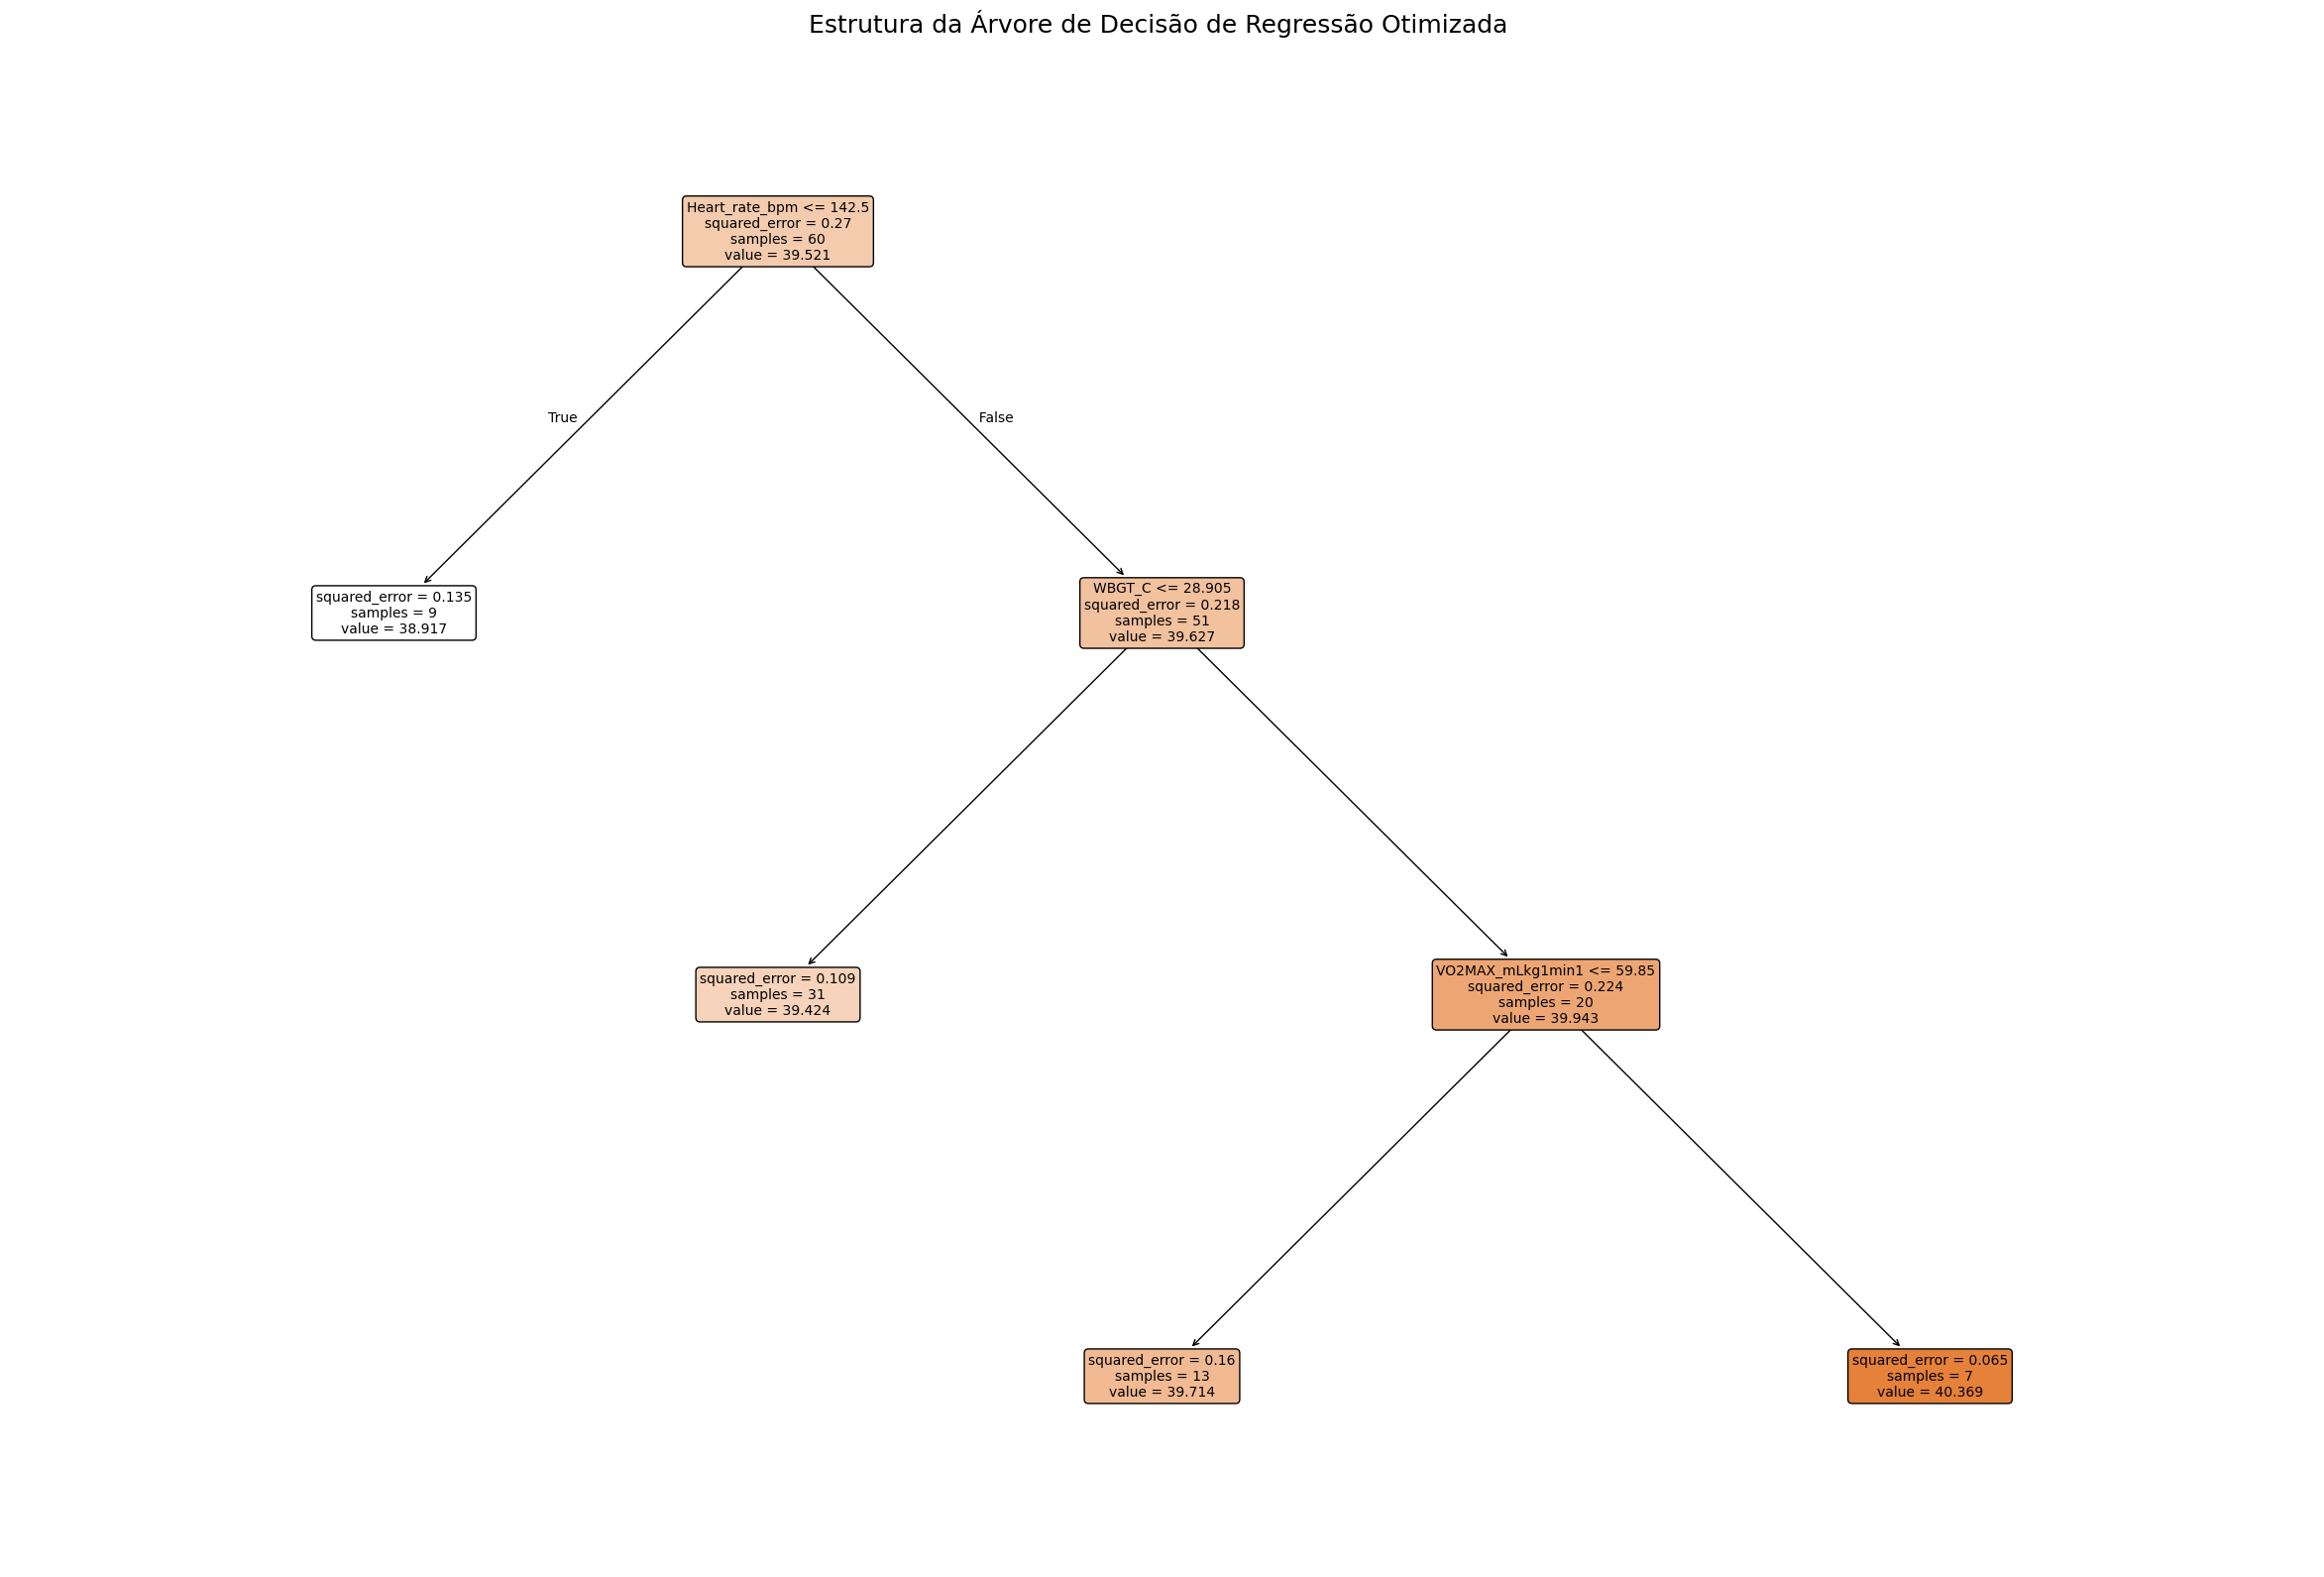

In [19]:
plt.figure(figsize=(30, 20))
plot_tree(best_dt_regressor, feature_names=X1.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Estrutura da Árvore de Decisão de Regressão Otimizada ", fontsize=18)
plt.show()

# **RANDOM FOREST**

## Pré-processamento - Random forest

In [20]:
X2 = df2.drop("EndTCORE_C", axis=1) #separando as variaveis preditoras
y2 = df2["EndTCORE_C"] #separando a variavel predita

In [21]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=42)#separando a base de dados de treino(80%) e teste(20%)

In [22]:
#otimizacao de hiperparametros
param_grid_rf = {
    'n_estimators': [50, 140], # numero de arvores na floresta
    'max_depth': [ 2,3], # profundidade máxima de cada arvore
    'min_samples_leaf': [3,5, 10, 15], # minimo de amostras em um nó folha
    'min_samples_split': [ 9,15, 20], # minimo de amostras para dividir um nó
    'max_features': ['log2'], # numero de features a considerar em cada split
    'ccp_alpha': [0.01,0.02,0.1] #custo de complexidade
}

In [23]:
rf_regressor_base = RandomForestRegressor(random_state=42) #criacao da instancia do modelo random forest, utilizando random_state=42 para asegurar reprodutibilidade 

In [24]:
grid_search_rf = GridSearchCV(estimator=rf_regressor_base, #algoritmo base
                              param_grid=param_grid_rf, #hiperparametros
                              cv=5, #5 K-fold (validacao cruzada)
                              scoring='neg_mean_squared_error', # otimiza para o menor MSE
                              n_jobs=-1, # usa todos os nucleos disponiveis
                              verbose=1) # exibe o progresso

## Treinamento do modelo - Rondom forest

In [25]:
grid_search_rf.fit(X_train2, y_train2) #treinando o modelos com a base de dados de treino

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'ccp_alpha': [0.01, 0.02, 0.1], 'max_depth': [2, 3],
                         'max_features': ['log2'],
                         'min_samples_leaf': [3, 5, 10, 15],
                         'min_samples_split': [9, 15, 20],
                         'n_estimators': [50, 140]},
             scoring='neg_mean_squared_error', verbose=1)

In [26]:
best_params_rf = grid_search_rf.best_params_
best_rf_regressor = grid_search_rf.best_estimator_

In [27]:
print(best_rf_regressor)

RandomForestRegressor(ccp_alpha=0.01, max_depth=3, max_features='log2',
                      min_samples_leaf=3, min_samples_split=9, n_estimators=140,
                      random_state=42)


In [28]:
y_pred_rf_optimized = best_rf_regressor.predict(X_test2)
y_pred_rf_train = best_rf_regressor.predict(X_train2)

## Avaliando o modelo - Random forest

**Dados de treino**

In [29]:
mse_rf_train = mean_squared_error(y_train2, y_pred_rf_train) #calculando MSE
rmse_rf_train = np.sqrt(mse_rf_train) #calculando RMSE
r2_rf_train = r2_score(y_train2, y_pred_rf_train) #calculando R2

In [30]:
print(f"\n--- Métricas de Avaliação do Modelo Random Forest OTIMIZADO (TREINO) ---")
print(f"Mean Squared Error (MSE): {mse_rf_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf_train:.2f}")
print(f"R-squared (R²): {r2_rf_train:.2f}")


--- Métricas de Avaliação do Modelo Random Forest OTIMIZADO (TREINO) ---
Mean Squared Error (MSE): 0.11
Root Mean Squared Error (RMSE): 0.34
R-squared (R²): 0.58


**Dados de teste**

In [31]:
mse_rf_optimized = mean_squared_error(y_test2, y_pred_rf_optimized) #calculando MSE
rmse_rf_optimized = np.sqrt(mse_rf_optimized) #calculando RMSE
r2_rf_optimized = r2_score(y_test2, y_pred_rf_optimized) #calculando R2

In [32]:
print(f"\n--- Métricas de Avaliação do Modelo Random Forest OTIMIZADO (TESTE) ---")
print(f"Mean Squared Error (MSE): {mse_rf_optimized:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf_optimized:.2f}")
print(f"R-squared (R²): {r2_rf_optimized:.2f}")


--- Métricas de Avaliação do Modelo Random Forest OTIMIZADO (TESTE) ---
Mean Squared Error (MSE): 0.14
Root Mean Squared Error (RMSE): 0.38
R-squared (R²): 0.50


## Gráficos

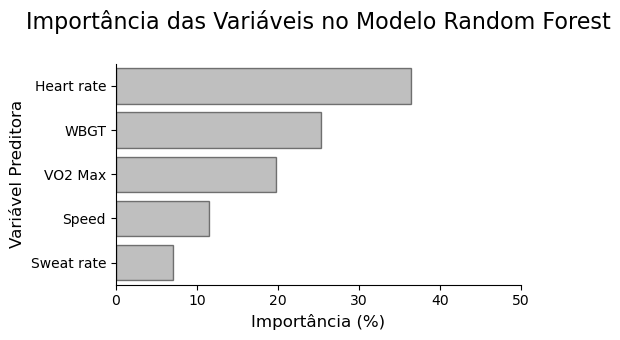

In [33]:
#estraindo a importancia das variaveis do modelo treinado 
importances_rf = (best_rf_regressor.feature_importances_)*100
feature_names_rf = X2.columns
# Criando DataFrame para facilitar a visualização
rf_importance_df = pd.DataFrame({
    'Feature': feature_names_rf,
    'Importance': importances_rf
}).sort_values(by='Importance', ascending=False)
mapa_de_nomes = {
    'Heart_rate_bpm': 'Heart rate',
    'WBGT_C': 'WBGT',
    'Initial_TCORE_C': 'Initial TCORE',
    'VO2MAX_mLkg1min1': 'VO2 Max',
    'Mean_TSKIN_C': 'Mean TSKIN',
    'Speed_kmh1': 'Speed',
    'Delta_mass_': 'Delta mass',
    'Sweat_rate_Lh1': 'Sweat rate',
    'Body_mass_kg': 'Body mass',
    'TCORE__TSKIN_C': 'TCORE-TSKIN'
}

rf_importance_df['Feature'] = rf_importance_df['Feature'].map(mapa_de_nomes)
# Plotando o gráfico de barras horizontais
fig, ax = plt.subplots(figsize=(5.5, 3.5))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df,edgecolor='black', color='gray',width=0.8,  alpha=0.5, ax=ax)
ax.set_title('Importância das Variáveis no Modelo Random Forest', fontsize=16, pad=25)
ax.set_xlabel('Importância (%)', fontsize=12)
ax.set_ylabel('Variável Preditora', fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(0, 50)
plt.tight_layout()
plt.show()

# **XGBOOST**

## Pré processamento - XGBoost

In [34]:
X3 = df3.drop("EndTCORE_C", axis=1) #separadando variaveis preditoras 
y3 = df3["EndTCORE_C"] #seprando variavel predita 

In [35]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.20, random_state=42) #separando a base de dados de treino(80%) e teste(20%)

In [36]:
#otmizacao de hiperparametros
param_grid_xgb = { 
    'n_estimators': [100,150], # numero de arvores 
    'learning_rate': [0.01,0.05], # taxa de aprendizado
    'max_depth': [3, 8], # profundidade maxima de cada arvore
    'subsample': [0.5, 0.6, 0.7], # subamostragem dos dados de treinamento
    'colsample_bytree': [0.6, 0.7], # subamostragem de colunas ao construir cada arvore
    'gamma': [0.5,0.9], # minima reducao de perda para fazer uma particao
    'min_child_weight': [8,10]
}

In [37]:
xgb_regressor_base = xgb.XGBRegressor(random_state=42, eval_metric='rmse') #criacao da instancia do modelo xgboost, utilizando random_state=42 para asegurar reprodutibilidade 

In [38]:
grid_search_xgb = GridSearchCV(estimator=xgb_regressor_base, #algoritmo base
                               param_grid=param_grid_xgb, #hiperparametros
                               cv=5, #5 K-fold (validacao cruzada)
                               scoring='neg_mean_squared_error', # otimiza para o menor MSE
                               n_jobs=-1, # usa todos os nucleos disponiveis
                               verbose=1) # exibe o progresso

## Treinamento do modelo - XGBoost

In [39]:
grid_search_xgb.fit(X_train3, y_train3) #treinando o modelo com base nos dados de treino

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False,
                                    eval_metric='rmse', feature_types=None,
                                    feature_weights=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=No...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.7], 'gamma': [0.5, 0.9],
                         'learning_rate': [0.01, 0.05], 'max_depth': [3, 8],
                         'min_child_weight': [8, 10],
                         'n_estimators': [100, 150],
                         'subsample': [0.5, 0.6, 0.7]},
             scoring='neg_mean_squared_error', verbose=1)

In [40]:
best_params_xgb = grid_search_xgb.best_params_
best_xgb_regressor = grid_search_xgb.best_estimator_

In [41]:
print(best_xgb_regressor)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=0.5, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=8, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=150,
             n_jobs=None, num_parallel_tree=None, ...)


In [42]:
y_pred_xgb_optimized = best_xgb_regressor.predict(X_test3)
y_pred_xgb_train = best_xgb_regressor.predict(X_train3)

## Avaliação do modelo - XGBoost

**Dados de treino**

In [43]:
mse_xgb_train = mean_squared_error(y_train3, y_pred_xgb_train) #calculando MSE
rmse_xgb_train = np.sqrt(mse_xgb_train) #calculando RMSE
r2_xgb_train = r2_score(y_train3, y_pred_xgb_train) #calculando R2

In [44]:
print(f"\n--- Métricas de Avaliação do Modelo XGBoost OTIMIZADO (TREINO) ---")
print(f"Mean Squared Error (MSE): {mse_xgb_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb_train:.2f}")
print(f"R-squared (R²): {r2_xgb_train:.2f}")


--- Métricas de Avaliação do Modelo XGBoost OTIMIZADO (TREINO) ---
Mean Squared Error (MSE): 0.11
Root Mean Squared Error (RMSE): 0.34
R-squared (R²): 0.58


**Dados de teste**

In [45]:
mse_xgb_optimized = mean_squared_error(y_test3, y_pred_xgb_optimized) #calculando MSE
rmse_xgb_optimized = np.sqrt(mse_xgb_optimized) #calculando RMSE
r2_xgb_optimized = r2_score(y_test3, y_pred_xgb_optimized) #cal;culando R2

In [46]:
print(f"\n--- Métricas de Avaliação do Modelo XGBoost OTIMIZADO (TESTE) ---")
print(f"Mean Squared Error (MSE): {mse_xgb_optimized:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb_optimized:.2f}")
print(f"R-squared (R²): {r2_xgb_optimized:.2f}")


--- Métricas de Avaliação do Modelo XGBoost OTIMIZADO (TESTE) ---
Mean Squared Error (MSE): 0.13
Root Mean Squared Error (RMSE): 0.36
R-squared (R²): 0.54


## Gráficos

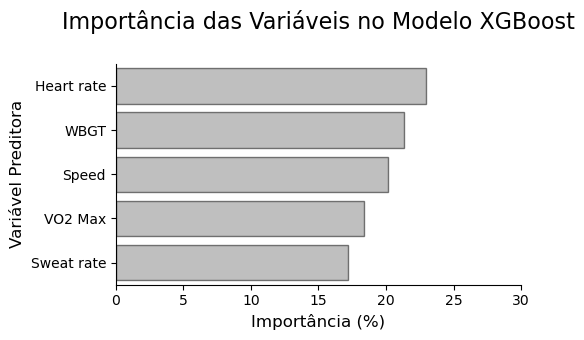

In [47]:
# Extrair a importância das variáveis do modelo treinado
importances_xgb = (best_xgb_regressor.feature_importances_)*100
feature_names_xgb = X3.columns
# Criar um DataFrame para visualização
xgb_importance_df = pd.DataFrame({
    'Feature': feature_names_xgb,
    'Importance': importances_xgb
}).sort_values(by='Importance', ascending=False).round(2)
xgb_importance_df['Feature'] = xgb_importance_df['Feature'].map(mapa_de_nomes)
# Plotar o gráfico de barras horizontais
fig, ax = plt.subplots(figsize=(5.5, 3.5))
sns.barplot(x='Importance', y='Feature', data=xgb_importance_df, edgecolor='black', color='gray',width=0.8,  alpha=0.5, ax=ax)

ax.set_title('Importância das Variáveis no Modelo XGBoost', fontsize=16, pad=25)
ax.set_xlabel('Importância (%)', fontsize=12)
ax.set_ylabel('Variável Preditora', fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(0, 30)
plt.tight_layout()
plt.show()

# **LASSO REFRESSION**

## Pré processamento - LASSO regression

In [48]:
X4 = df4.drop("EndTCORE_C", axis=1) #seprando as variaveis preditoras 
y4 = df4["EndTCORE_C"] #separando a variavel predita

In [49]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.30, random_state=42) #separando a base de dados de treino(80%) e teste(20%)

In [50]:
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Primeiro, padroniza as features
    ('lasso', Lasso(random_state=42, max_iter=10000)) # Em seguida, aplica a Regressão Lasso
])


In [51]:
param_grid_lasso = {
    'lasso__alpha': np.logspace(-5, 0, 15) # Testar de 0.0001 a 100 em escala logarítmica
}

In [52]:
grid_search_lasso = GridSearchCV(estimator=pipeline, #estimador agora e o pipeline
                                 param_grid=param_grid_lasso, #hiperparamentros
                                 cv=5, #5 K-fold (validacao cruzada)
                                 scoring='neg_mean_squared_error', # otimiza para o menor MSE
                                 n_jobs=-1, # Usa todos os nucleos disponiveis
                                 verbose=1) # exibe o progresso

## Treinamento do modelo - LASSO regression

In [53]:
grid_search_lasso.fit(X_train4, y_train4) #treinando modelo com base dados treino

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso',
                                        Lasso(max_iter=10000,
                                              random_state=42))]),
             n_jobs=-1,
             param_grid={'lasso__alpha': array([1.00000000e-05, 2.27584593e-05, 5.17947468e-05, 1.17876863e-04,
       2.68269580e-04, 6.10540230e-04, 1.38949549e-03, 3.16227766e-03,
       7.19685673e-03, 1.63789371e-02, 3.72759372e-02, 8.48342898e-02,
       1.93069773e-01, 4.39397056e-01, 1.00000000e+00])},
             scoring='neg_mean_squared_error', verbose=1)

In [54]:
best_params_lasso = grid_search_lasso.best_params_
best_lasso_regressor_pipeline = grid_search_lasso.best_estimator_

In [55]:
y_pred_lasso_optimized = best_lasso_regressor_pipeline.predict(X_test4)
y_pred_lasso_train = best_lasso_regressor_pipeline.predict(X_train4)

## Avaliação do modelo - LASSO regression

**Dados treino**

In [56]:
mse_lasso_train = mean_squared_error(y_train4, y_pred_lasso_train) #calculando MSE
rmse_lasso_train = np.sqrt(mse_lasso_train) #calculando RMSE
r2_lasso_train = r2_score(y_train4, y_pred_lasso_train) #calculando R21

In [57]:
print(f"\n--- Métricas de Avaliação do Modelo Lasso Regression OTIMIZADO (TREINO) ---")
print(f"Mean Squared Error (MSE): {mse_lasso_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso_train:.2f}")
print(f"R-squared (R²): {r2_lasso_train:.2f}")


--- Métricas de Avaliação do Modelo Lasso Regression OTIMIZADO (TREINO) ---
Mean Squared Error (MSE): 0.13
Root Mean Squared Error (RMSE): 0.37
R-squared (R²): 0.46


**Dados teste**

In [58]:
mse_lasso_optimized = mean_squared_error(y_test4, y_pred_lasso_optimized) #calculando MSE
rmse_lasso_optimized = np.sqrt(mse_lasso_optimized) #calculando RMSE
r2_lasso_optimized = r2_score(y_test4, y_pred_lasso_optimized) #calculando R2

In [59]:
print(f"\n--- Métricas de Avaliação do Modelo Lasso Regression OTIMIZADO (TESTE) ---")
print(f"Mean Squared Error (MSE): {mse_lasso_optimized:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso_optimized:.2f}")
print(f"R-squared (R²): {r2_lasso_optimized:.2f}")


--- Métricas de Avaliação do Modelo Lasso Regression OTIMIZADO (TESTE) ---
Mean Squared Error (MSE): 0.18
Root Mean Squared Error (RMSE): 0.43
R-squared (R²): 0.45


## Gráficos

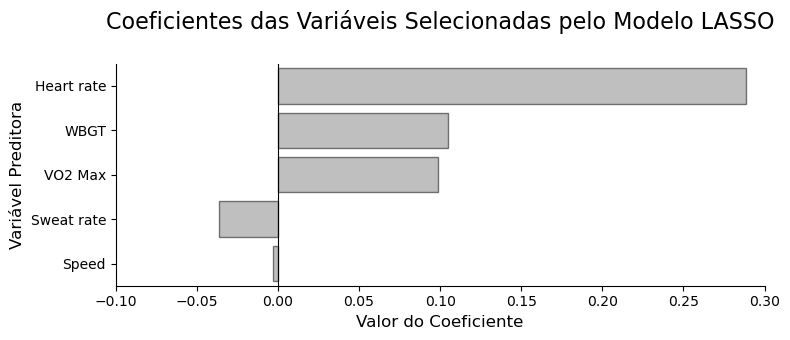

In [60]:
coefficients_lasso = best_lasso_regressor_pipeline.named_steps['lasso'].coef_
feature_names_lasso = X4.columns
# Criar um DataFrame para visualização
lasso_coef_df = pd.DataFrame({
    'Feature': feature_names_lasso,
    'Coefficient': coefficients_lasso
}).sort_values(by='Coefficient', key=abs, ascending=False)
# Filtrar apenas coeficientes não nulos (variáveis selecionadas pelo LASSO)
lasso_coef_nonzero_df = lasso_coef_df[lasso_coef_df['Coefficient']!= 0]
lasso_coef_nonzero_df['Feature'] = lasso_coef_nonzero_df['Feature'].map(mapa_de_nomes)
# Plotar o gráfico de barras horizontais
fig, ax = plt.subplots(figsize=(8, 3.5))
sns.barplot(x='Coefficient', y='Feature', data=lasso_coef_nonzero_df, edgecolor='black', color='gray',width=0.8,  alpha=0.5, ax=ax)

ax.set_title('Coeficientes das Variáveis Selecionadas pelo Modelo LASSO', fontsize=16, pad=25)
ax.set_xlabel('Valor do Coeficiente', fontsize=12)
ax.set_ylabel('Variável Preditora', fontsize=12)
ax.axvline(0, color='black', linewidth=0.8) # Adiciona uma linha no zero para referência

ax.set_xlim(-0.1, 0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('grafico_teste.png', dpi=300, bbox_inches='tight')
plt.show()


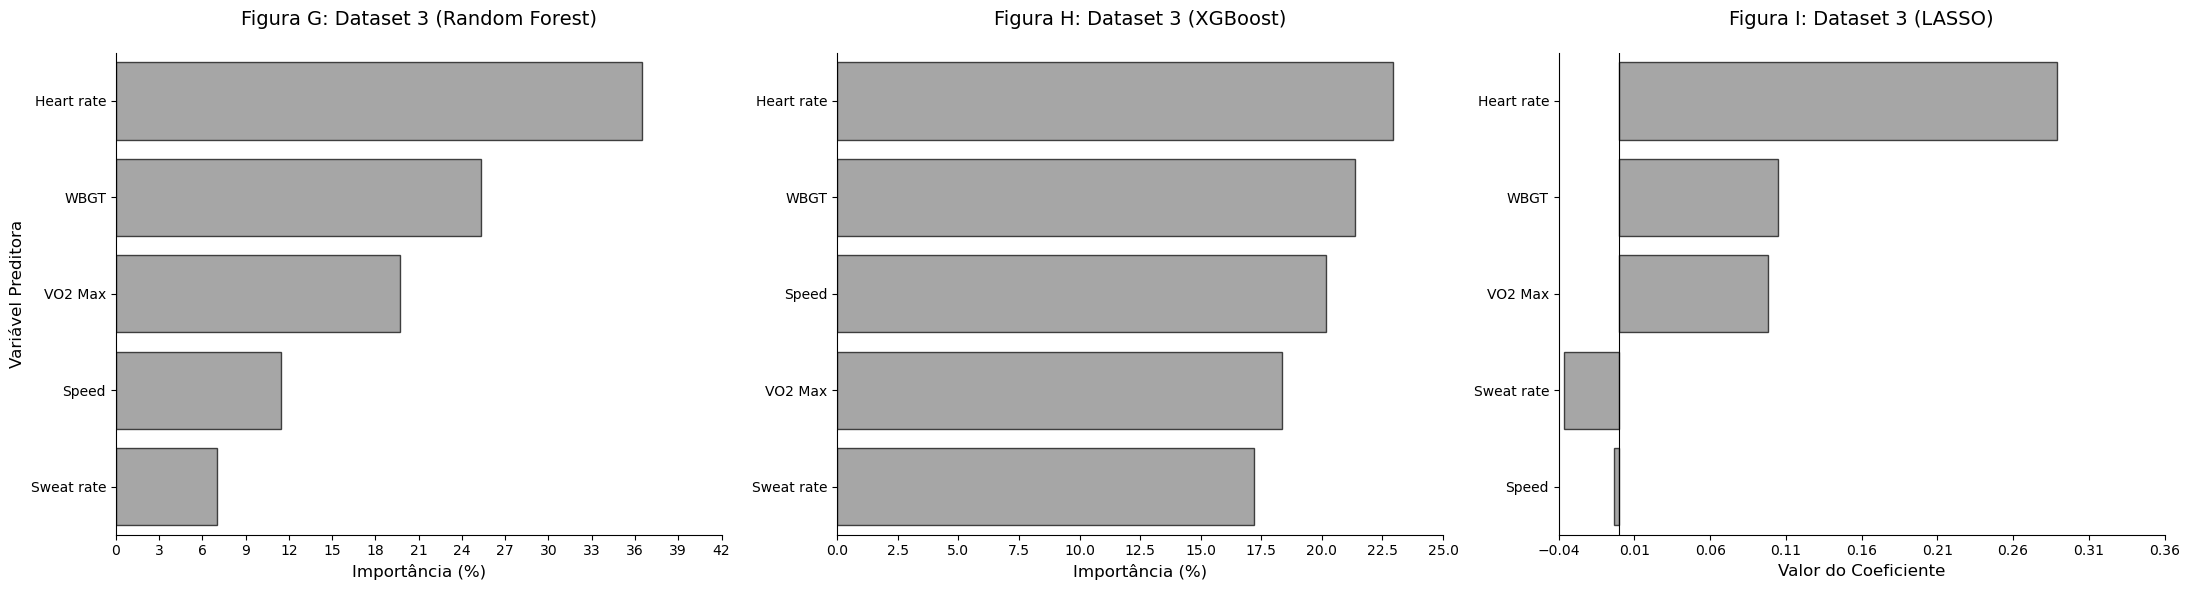

In [86]:
# Mapeamento de nomes (definido uma vez para ser usado em todos os gráficos)
mapa_de_nomes = {
    'Heart_rate_bpm': 'Heart rate',
    'WBGT_C': 'WBGT',
    'Initial_TCORE_C': 'Initial TCORE',
    'VO2MAX_mLkg1min1': 'VO2 Max',
    'Mean_TSKIN_C': 'Mean TSKIN',
    'Speed_kmh1': 'Speed',
    'Delta_mass_': 'Delta mass',
    'Sweat_rate_Lh1': 'Sweat rate',
    'Body_mass_kg': 'Body mass',
    'TCORE__TSKIN_C': 'TCORE-TSKIN'
}

# Dados para o Gráfico A (Random Forest)
importances_rf = (best_rf_regressor.feature_importances_) * 100
feature_names_rf = X2.columns
rf_importance_df = pd.DataFrame({
    'Feature': feature_names_rf,
    'Importance': importances_rf
}).sort_values(by='Importance', ascending=False)
rf_importance_df['Feature'] = rf_importance_df['Feature'].map(mapa_de_nomes)

# Dados para o Gráfico B (XGBoost)
importances_xgb = (best_xgb_regressor.feature_importances_) * 100
feature_names_xgb = X3.columns
xgb_importance_df = pd.DataFrame({
    'Feature': feature_names_xgb,
    'Importance': importances_xgb
}).sort_values(by='Importance', ascending=False).round(2)
xgb_importance_df['Feature'] = xgb_importance_df['Feature'].map(mapa_de_nomes)

# Dados para o Gráfico C (LASSO)
coefficients_lasso = best_lasso_regressor_pipeline.named_steps['lasso'].coef_
feature_names_lasso = X4.columns
lasso_coef_df = pd.DataFrame({
    'Feature': feature_names_lasso,
    'Coefficient': coefficients_lasso
}).sort_values(by='Coefficient', key=abs, ascending=False)
lasso_coef_nonzero_df = lasso_coef_df[lasso_coef_df['Coefficient'] != 0]
lasso_coef_nonzero_df['Feature'] = lasso_coef_nonzero_df['Feature'].map(mapa_de_nomes)


# --- 2. CRIAÇÃO DO PAINEL COM 3 GRÁFICOS (SUBPLOTS) ---
fig, axes = plt.subplots(1, 3, figsize=(22, 6))

# --- Gráfico A: Random Forest ---
sns.barplot(x='Importance', y='Feature', data=rf_importance_df, edgecolor='black', color='gray', width=0.8, alpha=0.7, ax=axes[0])
axes[0].set_title('Figura G: Dataset 3 (Random Forest)', fontsize=14, pad=20)
axes[0].set_xlabel('Importância (%)', fontsize=12)
axes[0].set_ylabel('Variável Preditora', fontsize=12)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].set_xlim(0, 40)
axes[0].set_xticks(np.arange(0, 44, 3))

# --- Gráfico B: XGBoost ---
sns.barplot(x='Importance', y='Feature', data=xgb_importance_df, edgecolor='black', color='gray', width=0.8, alpha=0.7, ax=axes[1])
axes[1].set_title('Figura H: Dataset 3 (XGBoost)', fontsize=14, pad=20)
axes[1].set_xlabel('Importância (%)', fontsize=12)
axes[1].set_ylabel('') # Remove o rótulo Y para um visual mais limpo
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].set_xlim(0, 25)
axes[1].set_xticks(np.arange(0, 26, 2.5))


# --- Gráfico C: LASSO ---
sns.barplot(x='Coefficient', y='Feature', data=lasso_coef_nonzero_df, edgecolor='black', color='gray', width=0.8, alpha=0.7, ax=axes[2])
axes[2].set_title('Figura I: Dataset 3 (LASSO)', fontsize=14, pad=20)
axes[2].set_xlabel('Valor do Coeficiente', fontsize=12)
axes[2].set_ylabel('') # Remove o rótulo Y para um visual mais limpo
axes[2].axvline(0, color='black', linewidth=0.8)
axes[2].set_xlim(-0.04, 0.3)
axes[2].set_xticks(np.arange(-0.04, 0.4, 0.05))
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)


# --- 3. FINALIZAÇÃO E EXIBIÇÃO ---

# Ajusta o layout para evitar sobreposição de títulos e rótulos
plt.tight_layout()

# Salva a figura inteira contendo os três gráficos
plt.savefig('graficos_dataset3_modelos_comparativo3.png', dpi=300, bbox_inches='tight')

# Mostra o resultado final
plt.show()

# Conclusão